Assignment 2

Implementing a Multiclass Classifier using Deep neural network for the task of OCR character recognition using the Letter Recognition Dataset by python.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_csv("LRC.data")
data.sample()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
4630,D,6,10,6,5,4,9,6,3,7,10,4,7,5,7,8,7


In [6]:
x = data.iloc[:, 1:17]
y = data.select_dtypes(include = [object])
x, y

(       2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
 0      5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
 1      4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
 2      7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
 3      2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
 4      4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
 ...   ..  .. .. .. ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
 19994  2   2  3  3  2    7   7  7  6    6   6    4    2    8    3    7
 19995  7  10  8  8  4    4   8  6  9   12   9   13    2    9    3    7
 19996  6   9  6  7  5    6  11  3  7   11   9    5    2   12    2    4
 19997  2   3  4  2  1    8   7  2  6   10   6    8    1    9    5    8
 19998  4   9  6  6  2    9   5  3  1    8   1    8    2    7    2    8
 
 [19999 rows x 16 columns],
        T
 0      I
 1      D
 2      N
 3      G
 4      S
 ...   ..
 19994  D
 19995  C
 19996  T
 19997

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=20)

In [8]:
scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [9]:
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [10]:
mlp = MLPClassifier()

In [29]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\karan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\karan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\karan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


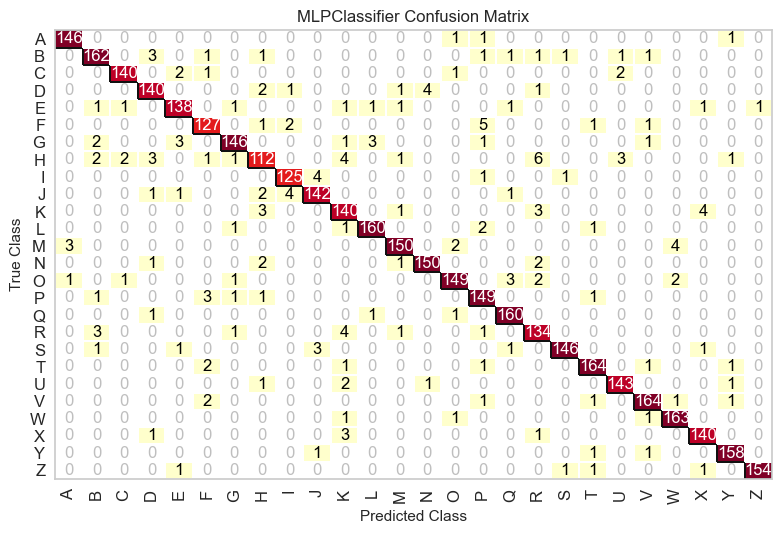

In [11]:
from yellowbrick.classifier import confusion_matrix
cm = confusion_matrix(mlp, xtrain, ytrain, xtest, ytest, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(","))

In [12]:
cm.fit(xtrain, ytrain.values.ravel())

ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x0000023478A30400>,
                estimator=MLPClassifier())

In [16]:
cm.score(xtest, ytest)

C:\Users\karan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9505

In [13]:
predictions = cm.predict(xtest)
predictions

array(['C', 'V', 'T', ..., 'T', 'Q', 'R'], dtype='<U1')

In [18]:
print("Accuracy : ", accuracy_score(ytest, predictions))

Accuracy :  0.9505


In [19]:
cmatrix = confusion_matrix(ytest.values.ravel(), predictions)

accuracy = np.trace(cmatrix) / np.sum(cmatrix)
print("Manual Accuracy:", accuracy)


TypeError: confusion_matrix() missing 1 required positional argument: 'y_train'

Confusion Matrix:
 [[146   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0
    0   0   0   0   0   0   1   0]
 [  0 162   0   3   0   1   0   1   0   0   0   0   0   0   0   1   1   1
    1   0   1   1   0   0   0   0]
 [  0   0 140   0   2   1   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   2   0   0   0   0   0]
 [  0   0   0 140   0   0   0   2   1   0   0   0   1   4   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   1   1   0 138   0   1   0   0   0   1   1   1   0   0   0   1   0
    0   0   0   0   0   1   0   1]
 [  0   0   0   0   0 127   0   1   2   0   0   0   0   0   0   5   0   0
    0   1   0   1   0   0   0   0]
 [  0   2   0   0   3   0 146   0   0   0   1   3   0   0   0   1   0   0
    0   0   0   1   0   0   0   0]
 [  0   2   2   3   0   1   1 112   0   0   4   0   1   0   0   0   0   6
    0   0   3   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0 125   4   0   0   0   0   0   1   0   0
    1   0   0   0   0   0   0   0]


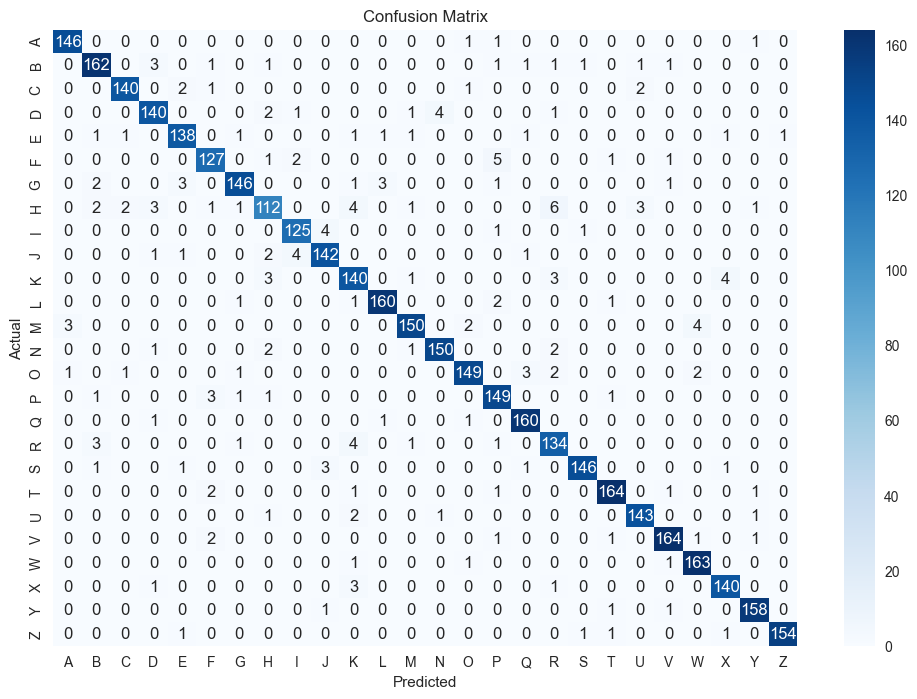

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict karo
predictions = mlp.predict(xtest)

# Confusion Matrix banao
cmatrix = confusion_matrix(ytest, predictions, labels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

# Print as 2D matrix
print("Confusion Matrix:\n", cmatrix)

# Optional: Heatmap if matplotlib/seaborn allowed
plt.figure(figsize=(12,8))
sns.heatmap(cmatrix, annot=True, fmt="d", xticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"), yticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"), cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict karo
predictions = mlp.predict(xtest)

# Confusion matrix banao
cmatrix = confusion_matrix(ytest.values.ravel(), predictions)

# Manual accuracy nikaalo
accuracy = np.trace(cmatrix) / np.sum(cmatrix)
print("Manual Accuracy:", accuracy)


Manual Accuracy: 0.9505
